In [1]:
import csv

In [2]:
import matplotlib.pyplot as plt

In [3]:
from matplotlib.ticker import FormatStrFormatter

In [4]:
with open('performance.csv', 'r') as file:
    reader=csv.DictReader(file)
    inputs = []
    for line in reader:
        inputs.append(line)


In [5]:
inputs[0].keys()

dict_keys(['Number of nodes', 'Delay Threshold', 'MaxSize', 'WorstTimeElapsed', 'MediumTimeElapsed', 'Mediana'])

In [6]:
numberOfNodes = [int(x["Number of nodes"]) for x in inputs if x["Delay Threshold"]=='0.1' if x["MaxSize"]=='10']

In [7]:
numberOfNodes

[10, 20, 50, 100, 200, 500, 1000, 2000, 5000]

In [8]:
delays = [float(x["Delay Threshold"])  for x in inputs if x["Number of nodes"]=='10' if x["MaxSize"]=='10']

In [9]:
delays

[0.1, 0.3, 0.5, 0.7]

In [10]:
maxSize =  [int(x["MaxSize"]) for x in inputs if x["Delay Threshold"]=='0.1' if x["Number of nodes"]=='10']

In [11]:
maxSize

[10, 25, 50]

# Time in function of number of nodes

In [12]:
timeDelay01=[int(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0 for x in inputs if x["Delay Threshold"]=='0.1' if x["MaxSize"]=='25']

In [13]:
timeDelay03=[int(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0 for x in inputs if x["Delay Threshold"]=='0.3' if x["MaxSize"]=='25']

In [14]:
timeDelay05=[int(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0 for x in inputs if x["Delay Threshold"]=='0.5' if x["MaxSize"]=='25']

In [15]:
timeDelay07=[int(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0 for x in inputs if x["Delay Threshold"]=='0.7' if x["MaxSize"]=='25']

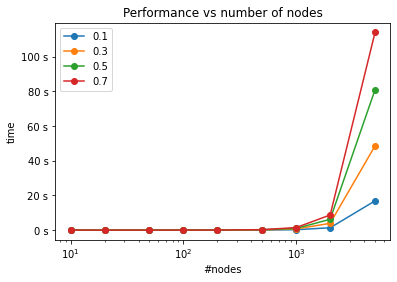

In [32]:
plt.plot(numberOfNodes, timeDelay01, 'o-', label='0.1')
plt.plot(numberOfNodes, timeDelay03, 'o-', label='0.3')
plt.plot(numberOfNodes, timeDelay05, 'o-', label='0.5')
plt.plot(numberOfNodes, timeDelay07, 'o-', label='0.7')
plt.legend()
plt.title("Performance vs number of nodes")
plt.xlabel("#nodes")
plt.ylabel("time")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d s'))
plt.xscale('log')

# Time in function of delay Threshold

In [17]:
timeNodes1000=[float(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0 for x in inputs if x["Number of nodes"]=='1000' if x["MaxSize"]=='25']

In [18]:
timeNodes1000

[0.229, 0.679, 0.983, 1.478]

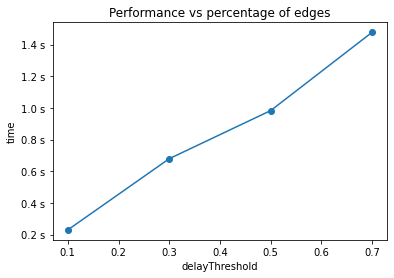

In [19]:
plt.plot(delays, timeNodes1000, 'o-')
#plt.legend()
plt.title("Performance vs percentage of edges")
plt.xlabel("delayThreshold")
plt.ylabel("time")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f s'))

In [20]:
timeNodes2000=[float(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0 for x in inputs if x["Number of nodes"]=='2000' if x["MaxSize"]=='25']

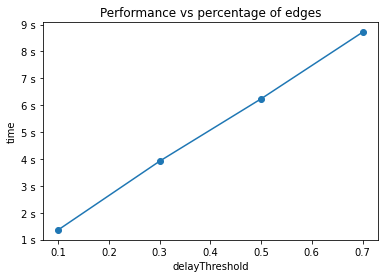

In [21]:
plt.plot(delays, timeNodes2000, 'o-')
#plt.legend()
plt.title("Performance vs percentage of edges")
plt.xlabel("delayThreshold")
plt.ylabel("time")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f s'))

In [22]:
timeNodes5000=[float(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0 for x in inputs if x["Number of nodes"]=='5000' if x["MaxSize"]=='25']

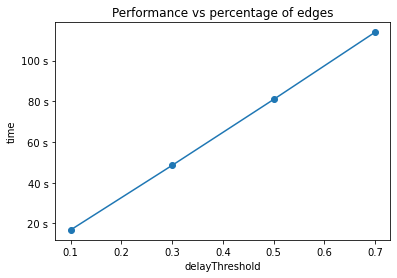

In [23]:
plt.plot(delays, timeNodes5000, 'o-')
#plt.legend()
plt.title("Performance vs percentage of edges")
plt.xlabel("delayThreshold")
plt.ylabel("time")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.f s'))

# Performance wrt community size

In [24]:
numberOfNodes

[10, 20, 50, 100, 200, 500, 1000, 2000, 5000]

In [25]:
newNodes = [x for x in numberOfNodes if x >=100 and x <5000]

In [26]:
newNodes

[100, 200, 500, 1000, 2000]

In [27]:
performance=[]
for n in newNodes:
    times = [float(x["Mediana"])/1000 if x["Mediana"]!='ZZZ' else 0 for x in inputs if x["Number of nodes"]==str(n) if x["Delay Threshold"]=='0.5']
    performance.append(times)

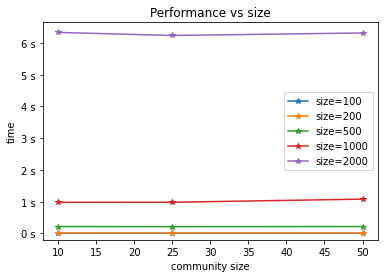

In [33]:
for p in performance:
    plt.plot(maxSize, p, '*-', label="size="+str(newNodes[performance.index(p)]))
    plt.legend()
    plt.title("Performance vs size")
    plt.xlabel("community size")
    plt.ylabel("time")
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f s'))
    plt.ylim(-0.2, max(p) +max(p)*0.05)